In [ ]:
from google.colab import files
uploaded = files.upload()
#file uploaded


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
# Reading the uploaded CSV file
df = pd.read_csv("student-por.csv")

df.insert(0, 'student_id', range(1, len(df) + 1))

#give the number of rows and columns
df.shape


(649, 34)

In [ ]:
# Display first few rows
df.head()

,student_id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,4,0,11,11
1,2,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,2,9,11,11
2,3,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,6,12,13,12
3,4,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,0,14,14,14
4,5,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
# Make the data folder
import os
os.makedirs('/content/data', exist_ok=True)

students = df[['student_id','school','sex','age','address','famsize','Pstatus',
               'Medu','Fedu','Mjob','Fjob','reason','guardian']]

study_logs = df[['student_id','traveltime','studytime','failures','absences','G1','G2','G3']]

students.to_csv('/content/data/students.csv', index=False)
study_logs.to_csv('/content/data/study_logs.csv', index=False)

print('Saved:', os.listdir('/content/data'))

Saved: ['students.csv', 'study_logs.csv']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

students = pd.read_csv('/content/data/students.csv')
study_logs = pd.read_csv('/content/data/study_logs.csv')
df = pd.merge(students, study_logs, on='student_id')

# show first rows
display(students.head())
display(study_logs.head())
display(df.head())


,student_id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
0,1,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother
1,2,GP,F,17,U,GT3,T,1,1,at_home,other,course,father
2,3,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother
3,4,GP,F,15,U,GT3,T,4,2,health,services,home,mother
4,5,GP,F,16,U,GT3,T,3,3,other,other,home,father


,student_id,traveltime,studytime,failures,absences,G1,G2,G3
0,1,2,2,0,4,0,11,11
1,2,1,2,0,2,9,11,11
2,3,1,2,0,6,12,13,12
3,4,1,3,0,0,14,14,14
4,5,1,2,0,0,11,13,13


,student_id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,absences,G1,G2,G3
0,1,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,4,0,11,11
1,2,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,2,9,11,11
2,3,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,6,12,13,12
3,4,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,0,14,14,14
4,5,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,0,11,13,13


In [ ]:
# Check if there are any missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)



Missing values in each column:
 student_id    0
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [ ]:
# Check total duplicates
duplicates = df.duplicated().sum()
print("Total duplicate rows:", duplicates)

# Remove duplicates if any
df = df.drop_duplicates()


Total duplicate rows: 0


In [ ]:
# Identify column types
print(df.dtypes)

# Convert numeric columns to integer type if needed
numeric_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'absences', 'G1','G2','G3']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

print(df[numeric_cols].dtypes)


student_id     int64
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object
age           int64
Medu          int64
Fedu          int64
traveltime    int64
studytime     int64
failures      int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Find all categorical columns (object type)
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

# Apply Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.head()


Categorical columns: Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian'],
      dtype='object')


,student_id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,absences,G1,G2,G3
0,1,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,4,0,11,11
1,2,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,2,9,11,11
2,3,0,0,15,1,1,1,1,1,0,2,2,1,1,2,0,6,12,13,12
3,4,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,14,14,14
4,5,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,11,13,13


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.head()


,student_id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,absences,G1,G2,G3
0,1,0,0,0.428571,1,0,0,1.00,1.00,0,4,0,1,0.333333,0.333333,0.0,0.1250,0.000000,0.578947,0.578947
1,2,0,0,0.285714,1,0,1,0.25,0.25,0,2,0,0,0.000000,0.333333,0.0,0.0625,0.473684,0.578947,0.578947
2,3,0,0,0.000000,1,1,1,0.25,0.25,0,2,2,1,0.000000,0.333333,0.0,0.1875,0.631579,0.684211,0.631579
3,4,0,0,0.000000,1,0,1,1.00,0.50,1,3,1,1,0.000000,0.666667,0.0,0.0000,0.736842,0.736842,0.736842
4,5,0,0,0.142857,1,0,1,0.75,0.75,2,2,1,0,0.000000,0.333333,0.0,0.0000,0.578947,0.684211,0.684211


In [ ]:
# Describe numeric columns
summary = df.describe()
print(summary)


       student_id      school         sex         age     address     famsize  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean   325.000000    0.348228    0.409861    0.249175    0.696456    0.295840   
std    187.494444    0.476776    0.492187    0.174020    0.460143    0.456771   
min      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%    163.000000    0.000000    0.000000    0.142857    0.000000    0.000000   
50%    325.000000    0.000000    0.000000    0.285714    1.000000    0.000000   
75%    487.000000    1.000000    1.000000    0.428571    1.000000    1.000000   
max    649.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

          Pstatus        Medu        Fedu        Mjob        Fjob      reason  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     0.876733    0.628659    0.576656    1.941448    2.224961    1.112481   
std      0.328996    0.2836

In [ ]:
# Compute correlation matrix
correlation = df.corr()
print(correlation['G3'].sort_values(ascending=False))


G3            1.000000
G2            0.918548
G1            0.826387
studytime     0.249789
Medu          0.240151
Fedu          0.211800
address       0.167637
Mjob          0.148252
reason        0.124969
Fjob          0.052953
famsize       0.045016
Pstatus      -0.000754
guardian     -0.079609
absences     -0.091379
age          -0.106505
traveltime   -0.127173
sex          -0.129077
student_id   -0.176843
school       -0.284294
failures     -0.393316
Name: G3, dtype: float64


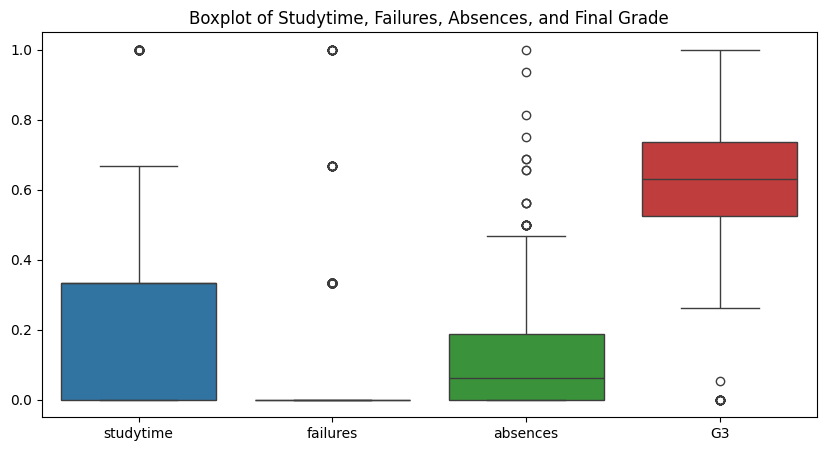

In [ ]:
# Use boxplots for numeric columns to spot outliers
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['studytime','failures','absences','G3']])
plt.title("Boxplot of Studytime, Failures, Absences, and Final Grade")
plt.show()


In [ ]:
# Check balance of categorical columns
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())



Value counts for school:
school
0    423
1    226
Name: count, dtype: int64

Value counts for sex:
sex
0    383
1    266
Name: count, dtype: int64

Value counts for address:
address
1    452
0    197
Name: count, dtype: int64

Value counts for famsize:
famsize
0    457
1    192
Name: count, dtype: int64

Value counts for Pstatus:
Pstatus
1    569
0     80
Name: count, dtype: int64

Value counts for Mjob:
Mjob
2    258
3    136
0    135
4     72
1     48
Name: count, dtype: int64

Value counts for Fjob:
Fjob
2    367
3    181
0     42
4     36
1     23
Name: count, dtype: int64

Value counts for reason:
reason
0    285
1    149
3    143
2     72
Name: count, dtype: int64

Value counts for guardian:
guardian
1    455
0    153
2     41
Name: count, dtype: int64


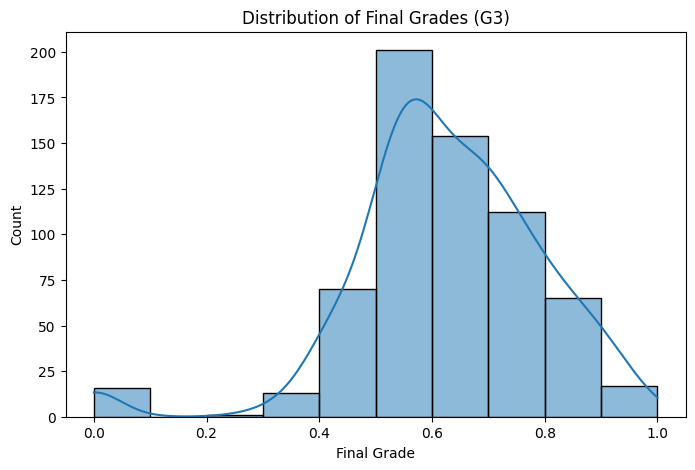

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['G3'], bins=10, kde=True)
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Final Grade")
plt.ylabel("Count")
plt.show()


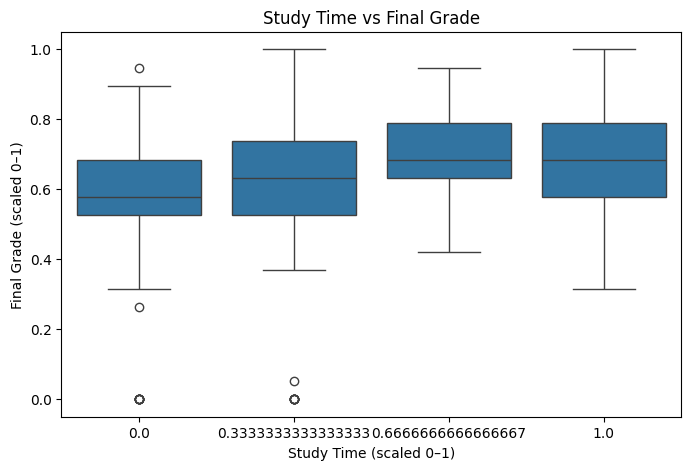

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='studytime', y='G3', data=df)
plt.title("Study Time vs Final Grade")
plt.xlabel("Study Time (scaled 0–1)")
plt.ylabel("Final Grade (scaled 0–1)")
plt.show()


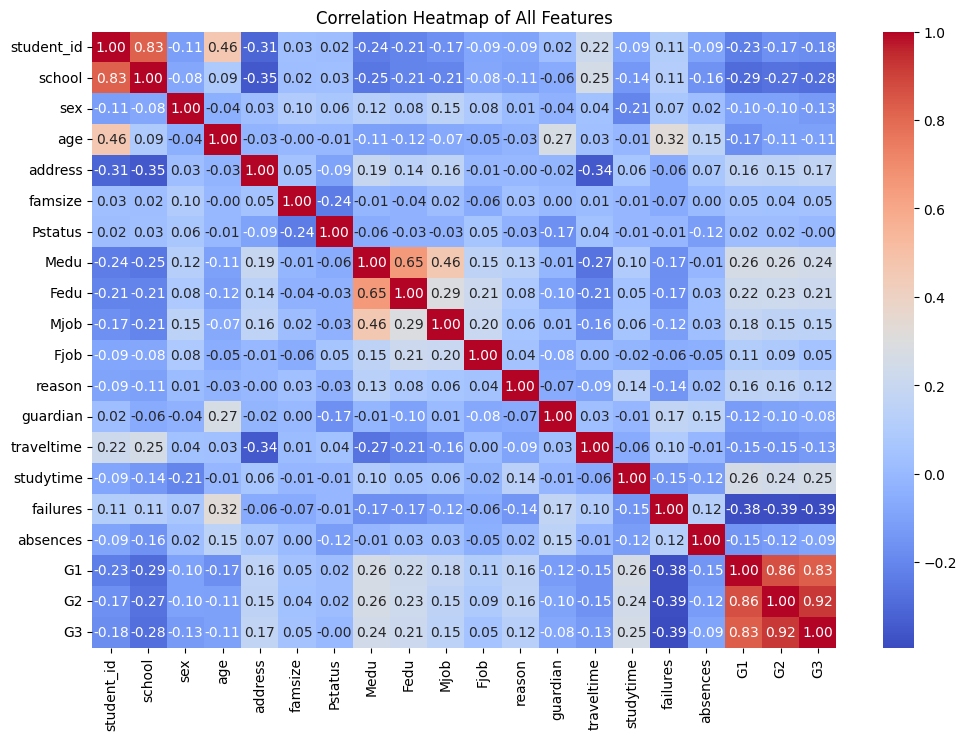

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of All Features")
plt.show()


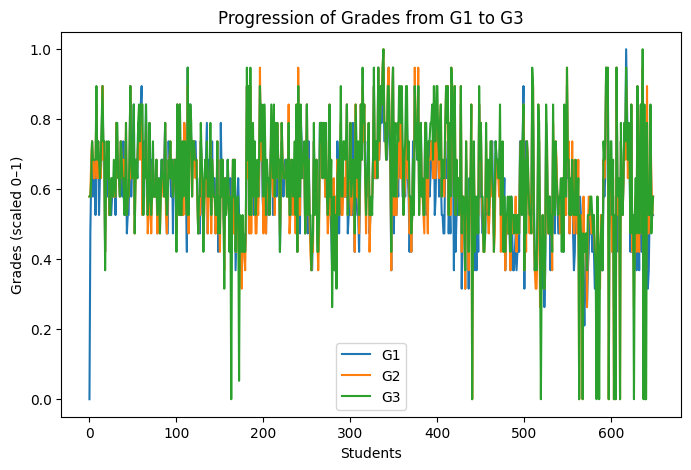

In [ ]:
# If we consider G1 -> G2 -> G3 as a "time series" of grades
plt.figure(figsize=(8,5))
plt.plot(range(len(df)), df['G1'], label='G1')
plt.plot(range(len(df)), df['G2'], label='G2')
plt.plot(range(len(df)), df['G3'], label='G3')
plt.title("Progression of Grades from G1 to G3")
plt.xlabel("Students")
plt.ylabel("Grades (scaled 0–1)")
plt.legend()
plt.show()
